# <font color='#0080ff'> SC1015 DS Project </font>

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [105]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.

We use sep='\t' to read tab-delimited data in csv format. 

Immediately after importing, take a quick look at the data using the `head` function.

In [106]:
marketingdata = pd.read_csv('marketing_campaign.csv', sep='\t', lineterminator='\r')
marketingdata = marketingdata.replace('\n','', regex=True) # Removing all \n after reading from csv
marketingdata= marketingdata.drop(['Z_CostContact','Z_Revenue'],axis=1) # Removing useless columns
marketingdata.dropna(inplace = True) # Drop all those rows which  have any 'nan' value in it.
marketingdata.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We then check the other vital statistics of the data such as its `type` and `shape`

In [107]:
print('Type of the data:', type(marketingdata))
print('Dims of the data:', marketingdata.shape)

Type of the data: <class 'pandas.core.frame.DataFrame'>
Dims of the data: (2216, 27)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [108]:
print(marketingdata.dtypes)

ID                      object
Year_Birth             float64
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Response               float64
dtype: object


---
## <font color = #0080ff> Context </font>
Our group will be exploring this data set on Kaggle which is Customer Personalirt Analysis by Akash Patel.
</br>Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

### <font color = #00cc99>Problem Statement(We can edit)</font>

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### <font color = #00cc99>Content </font>

#### **Attributes**

##### <font color = #ff9999>People</font>

>* ID: Customer's unique identifier
>* Year_Birth: Customer's birth year
>* Education: Customer's education level
>* Marital_Status: Customer's marital status
>* Income: Customer's yearly household income
>* Kidhome: Number of children in customer's household
>* Teenhome: Number of teenagers in customer's household
>* Dt_Customer: Date of customer's enrollment with the company
>* Recency: Number of days since customer's last purchase
>* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### <font color = #ff9999>Products</font>

>* MntWines: Amount spent on wine in last 2 years
>* MntFruits: Amount spent on fruits in last 2 years
>* MntMeatProducts: Amount spent on meat in last 2 years
>* MntFishProducts: Amount spent on fish in last 2 years
>* MntSweetProducts: Amount spent on sweets in last 2 years
>* MntGoldProds: Amount spent on gold in last 2 years

##### <font color = #ff9999>Promotion</font>

>* NumDealsPurchases: Number of purchases made with a discount
>* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### <font color = #ff9999>Place</font>

>* NumWebPurchases: Number of purchases made through the company’s website
>* NumCatalogPurchases: Number of purchases made using a catalogue
>* NumStorePurchases: Number of purchases made directly in stores
>* NumWebVisitsMonth: Number of visits to company’s website in the last month

### <font color = #00cc99>Target (We can edit)</font>
We will be performing **Classification** first to identify which factors which results in the greatest response which the customer accept the offer in the last campaign which allows the company to cater towards customers which fall within this category and also come up with new promotions or survey the customers which fall into the other category on why they did not follow up with the offer in the last campaign.

Next we will perform **Clustering** to to cluster and find out which groups are more likely to accept the offer in the last campaign so that the company can focus their promotions to such customers more.

### <font color = #00cc99>Acknowledgement</font>
The dataset for this project is provided by Dr. Omar Romero-Hernandez.


---
## <font color = #0080ff> We will start by setting up a simple Classfication problem</font>
Response Variable : **Response**  
These are the Predictors our group have chosen to see if they affect whether the customer accepted the offer in the last campaign.   
Predictor Feature : **Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds, AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5**   

Extract the variables and the associated data as a Pandas `DataFrame`.

In [160]:
response = pd.DataFrame(marketingdata['Response']) #Response
predictor = pd.DataFrame(marketingdata[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]) #Predictor

In [161]:
predictor_list = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

In [162]:
response.info()
print()
predictor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Response  2216 non-null   float64
dtypes: float64(1)
memory usage: 99.2 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2216 non-null   float64
 1   MntWines          2216 non-null   float64
 2   MntFruits         2216 non-null   float64
 3   MntMeatProducts   2216 non-null   float64
 4   MntFishProducts   2216 non-null   float64
 5   MntSweetProducts  2216 non-null   float64
 6   MntGoldProds      2216 non-null   float64
 7   AcceptedCmp1      2216 non-null   float64
 8   AcceptedCmp2      2216 non-null   float64
 9   AcceptedCmp3      2216 non-null   float64
 10  AcceptedCmp4      2216 non-null   float64
 11  AcceptedCmp5

0.0    1883
1.0     333
Name: Response, dtype: int64 



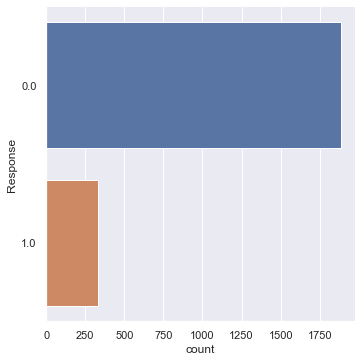

In [163]:
# Summary Statistics for Response
print(response["Response"].value_counts(), '\n')

# Plot the distributions of Response
sb.catplot(y = 'Response', data = response, kind = 'count')

## Set up the classification problem with Train and Test datasets. 

In [164]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (1662, 1) (1662, 12)
Test Set  : (554, 1) (554, 12)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [165]:
y_train.info()
print()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 729 to 130
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Response  1662 non-null   float64
dtypes: float64(1)
memory usage: 26.0 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 729 to 130
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            1662 non-null   float64
 1   MntWines          1662 non-null   float64
 2   MntFruits         1662 non-null   float64
 3   MntMeatProducts   1662 non-null   float64
 4   MntFishProducts   1662 non-null   float64
 5   MntSweetProducts  1662 non-null   float64
 6   MntGoldProds      1662 non-null   float64
 7   AcceptedCmp1      1662 non-null   float64
 8   AcceptedCmp2      1662 non-null   float64
 9   AcceptedCmp3      1662 non-null   float64
 10  AcceptedCmp4      1662 non-null   float64
 11  AcceptedCm

In [166]:
# Summary Statistics for Response
y_train["Response"].value_counts()

0.0    1412
1.0     250
Name: Response, dtype: int64

In [167]:
# Summary Statistics for Predictors
x_train.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
count,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000
mean,52227.810469,300.244886,25.959085,164.362214,37.134176,27.331528,43.678099,0.064380,0.012034,0.075211,0.072202,0.072202
std,26383.738305,332.477895,39.445656,221.282812,54.602163,41.839911,51.501950,0.245503,0.109069,0.263810,0.258900,0.258900
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35528.250000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50727.000000,172.500000,8.000000,68.000000,12.000000,8.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68110.750000,502.750000,32.000000,223.750000,49.000000,34.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,666666.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,1.000000,1.000000,1.000000,1.000000,1.000000


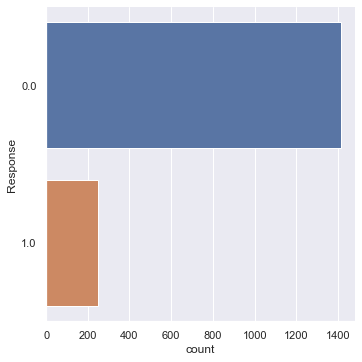

In [168]:
# Draw the distribution of Response in train
sb.catplot(y = "Response", data = y_train, kind = "count")

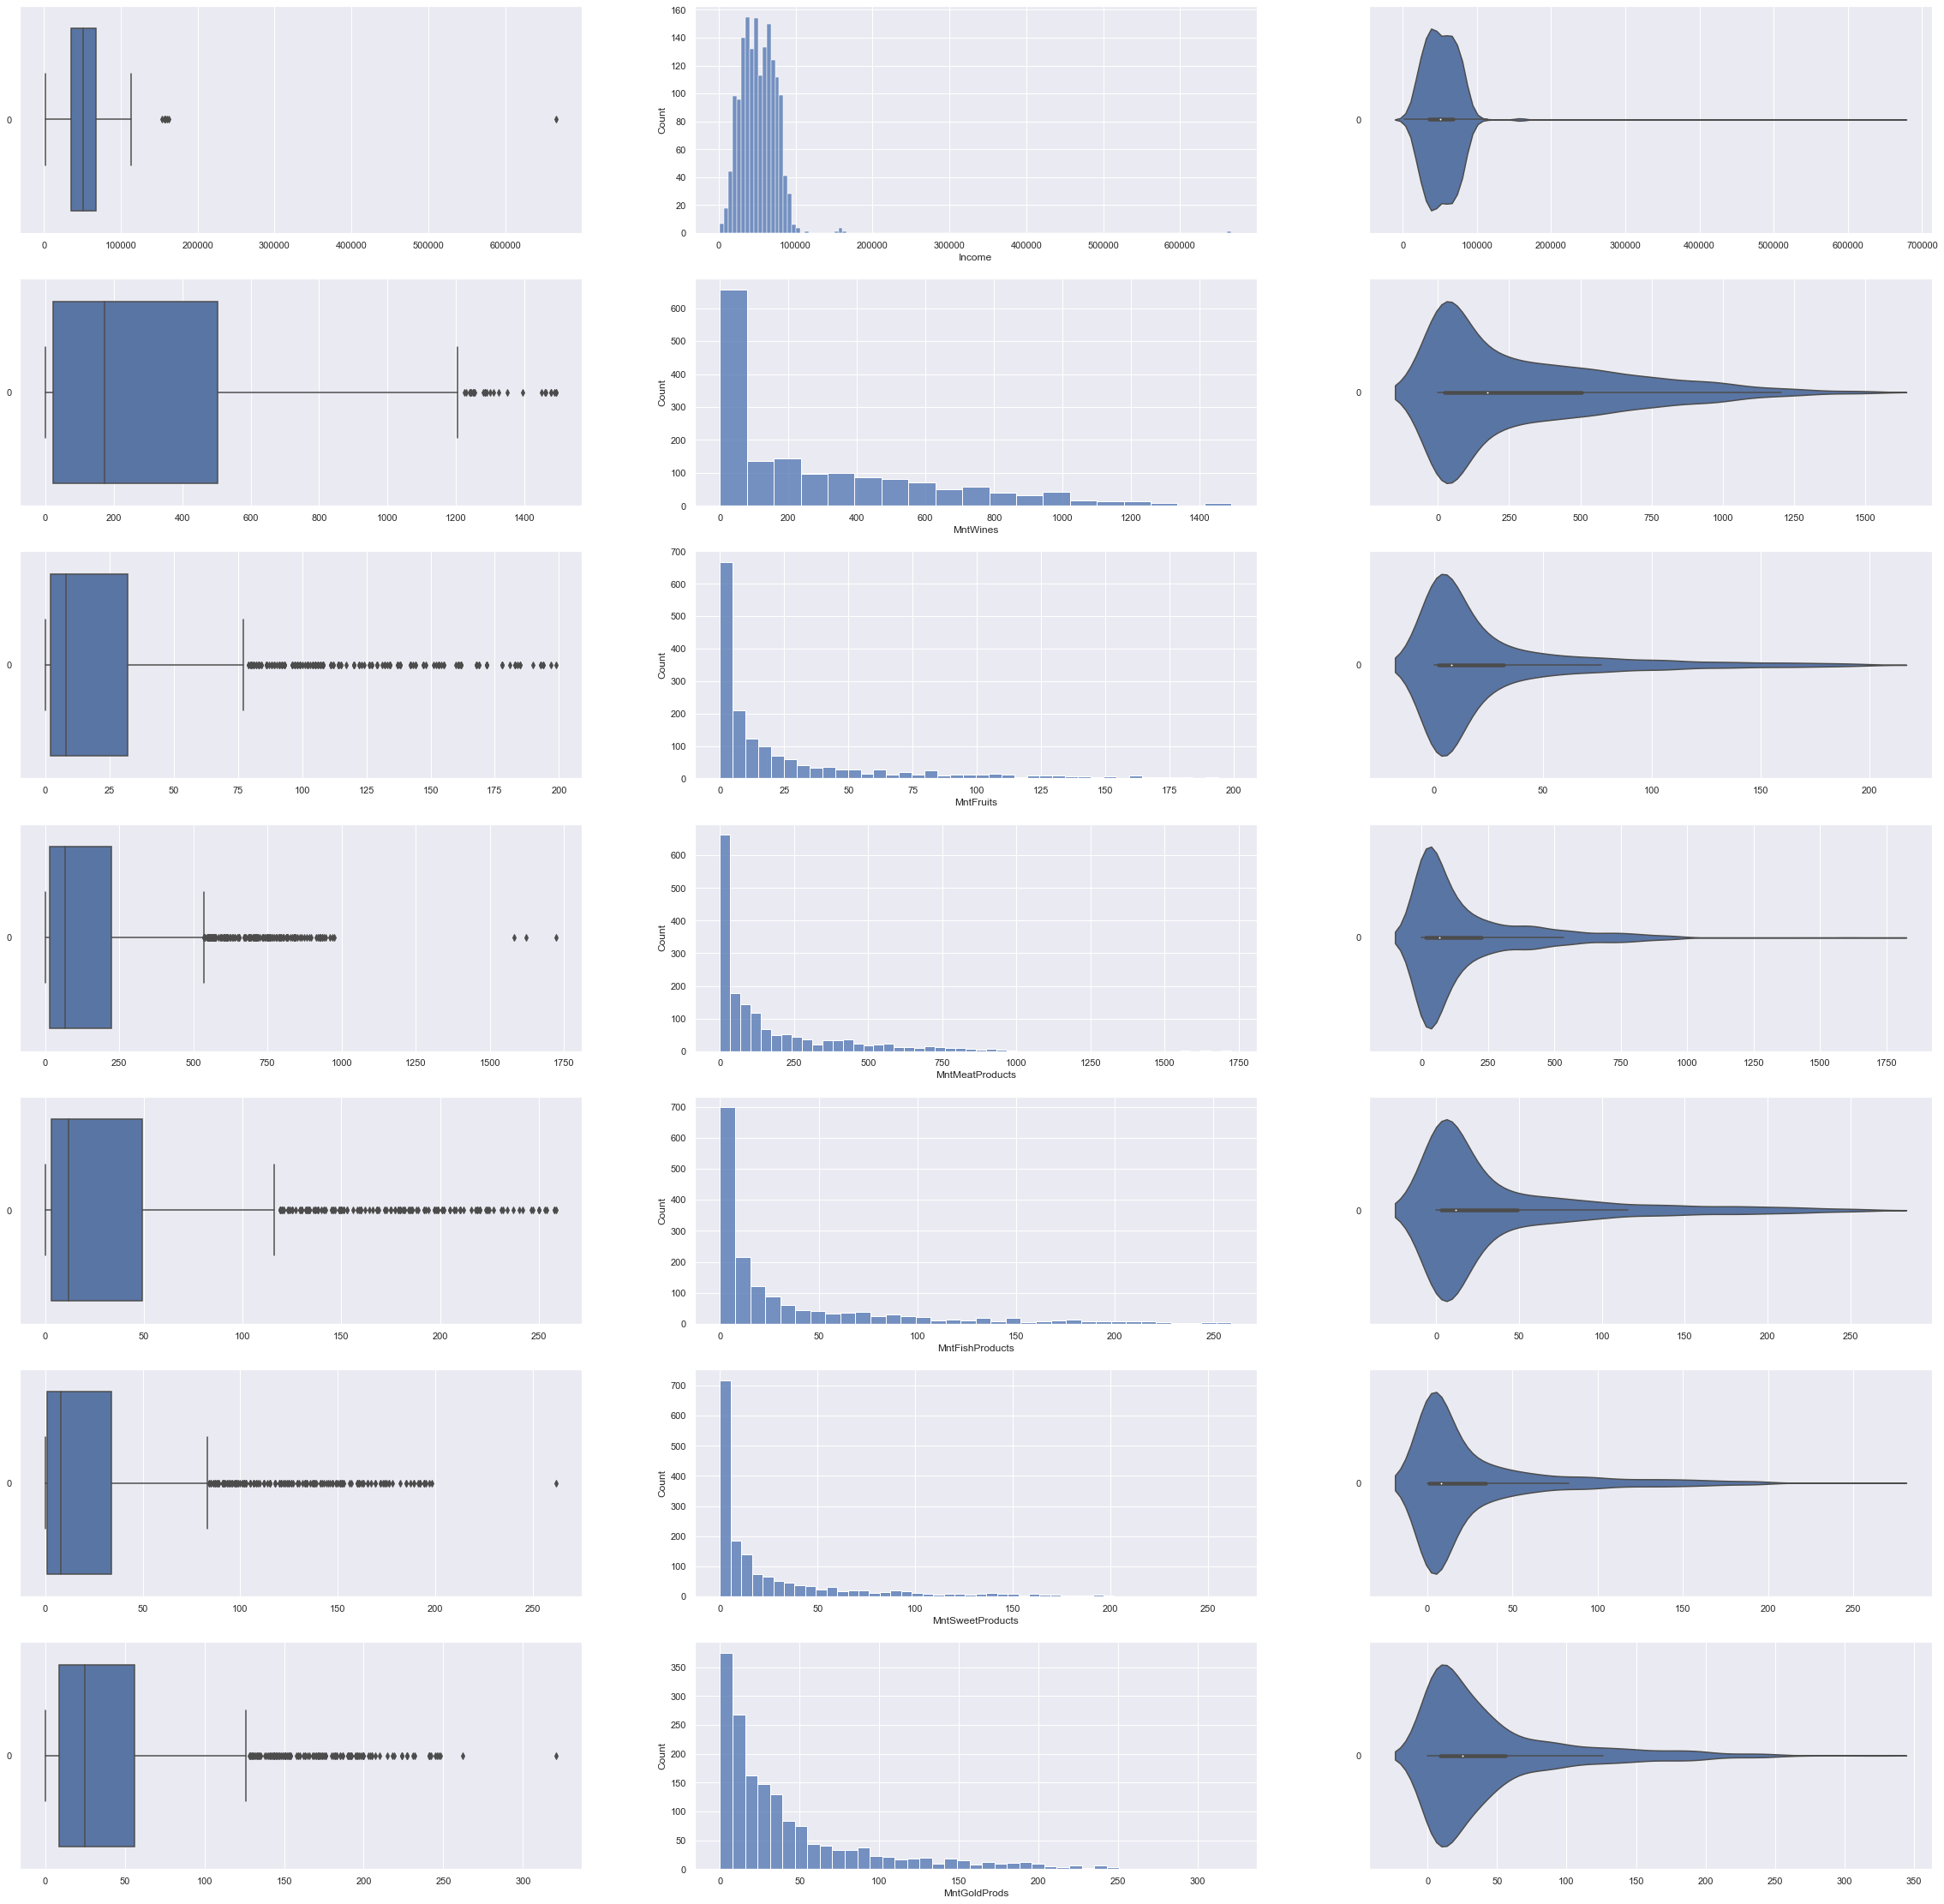

In [169]:
# Draw the distributions of all numeric Predictors
f, axes = plt.subplots(7, 3, figsize=(40, 40))

count = 0
for var in predictor_list:
    if(var not in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
        sb.boxplot(data = x_train[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = x_train[var], ax = axes[count,1])
        sb.violinplot(data = x_train[var], orient = "h", ax = axes[count,2])
        count += 1

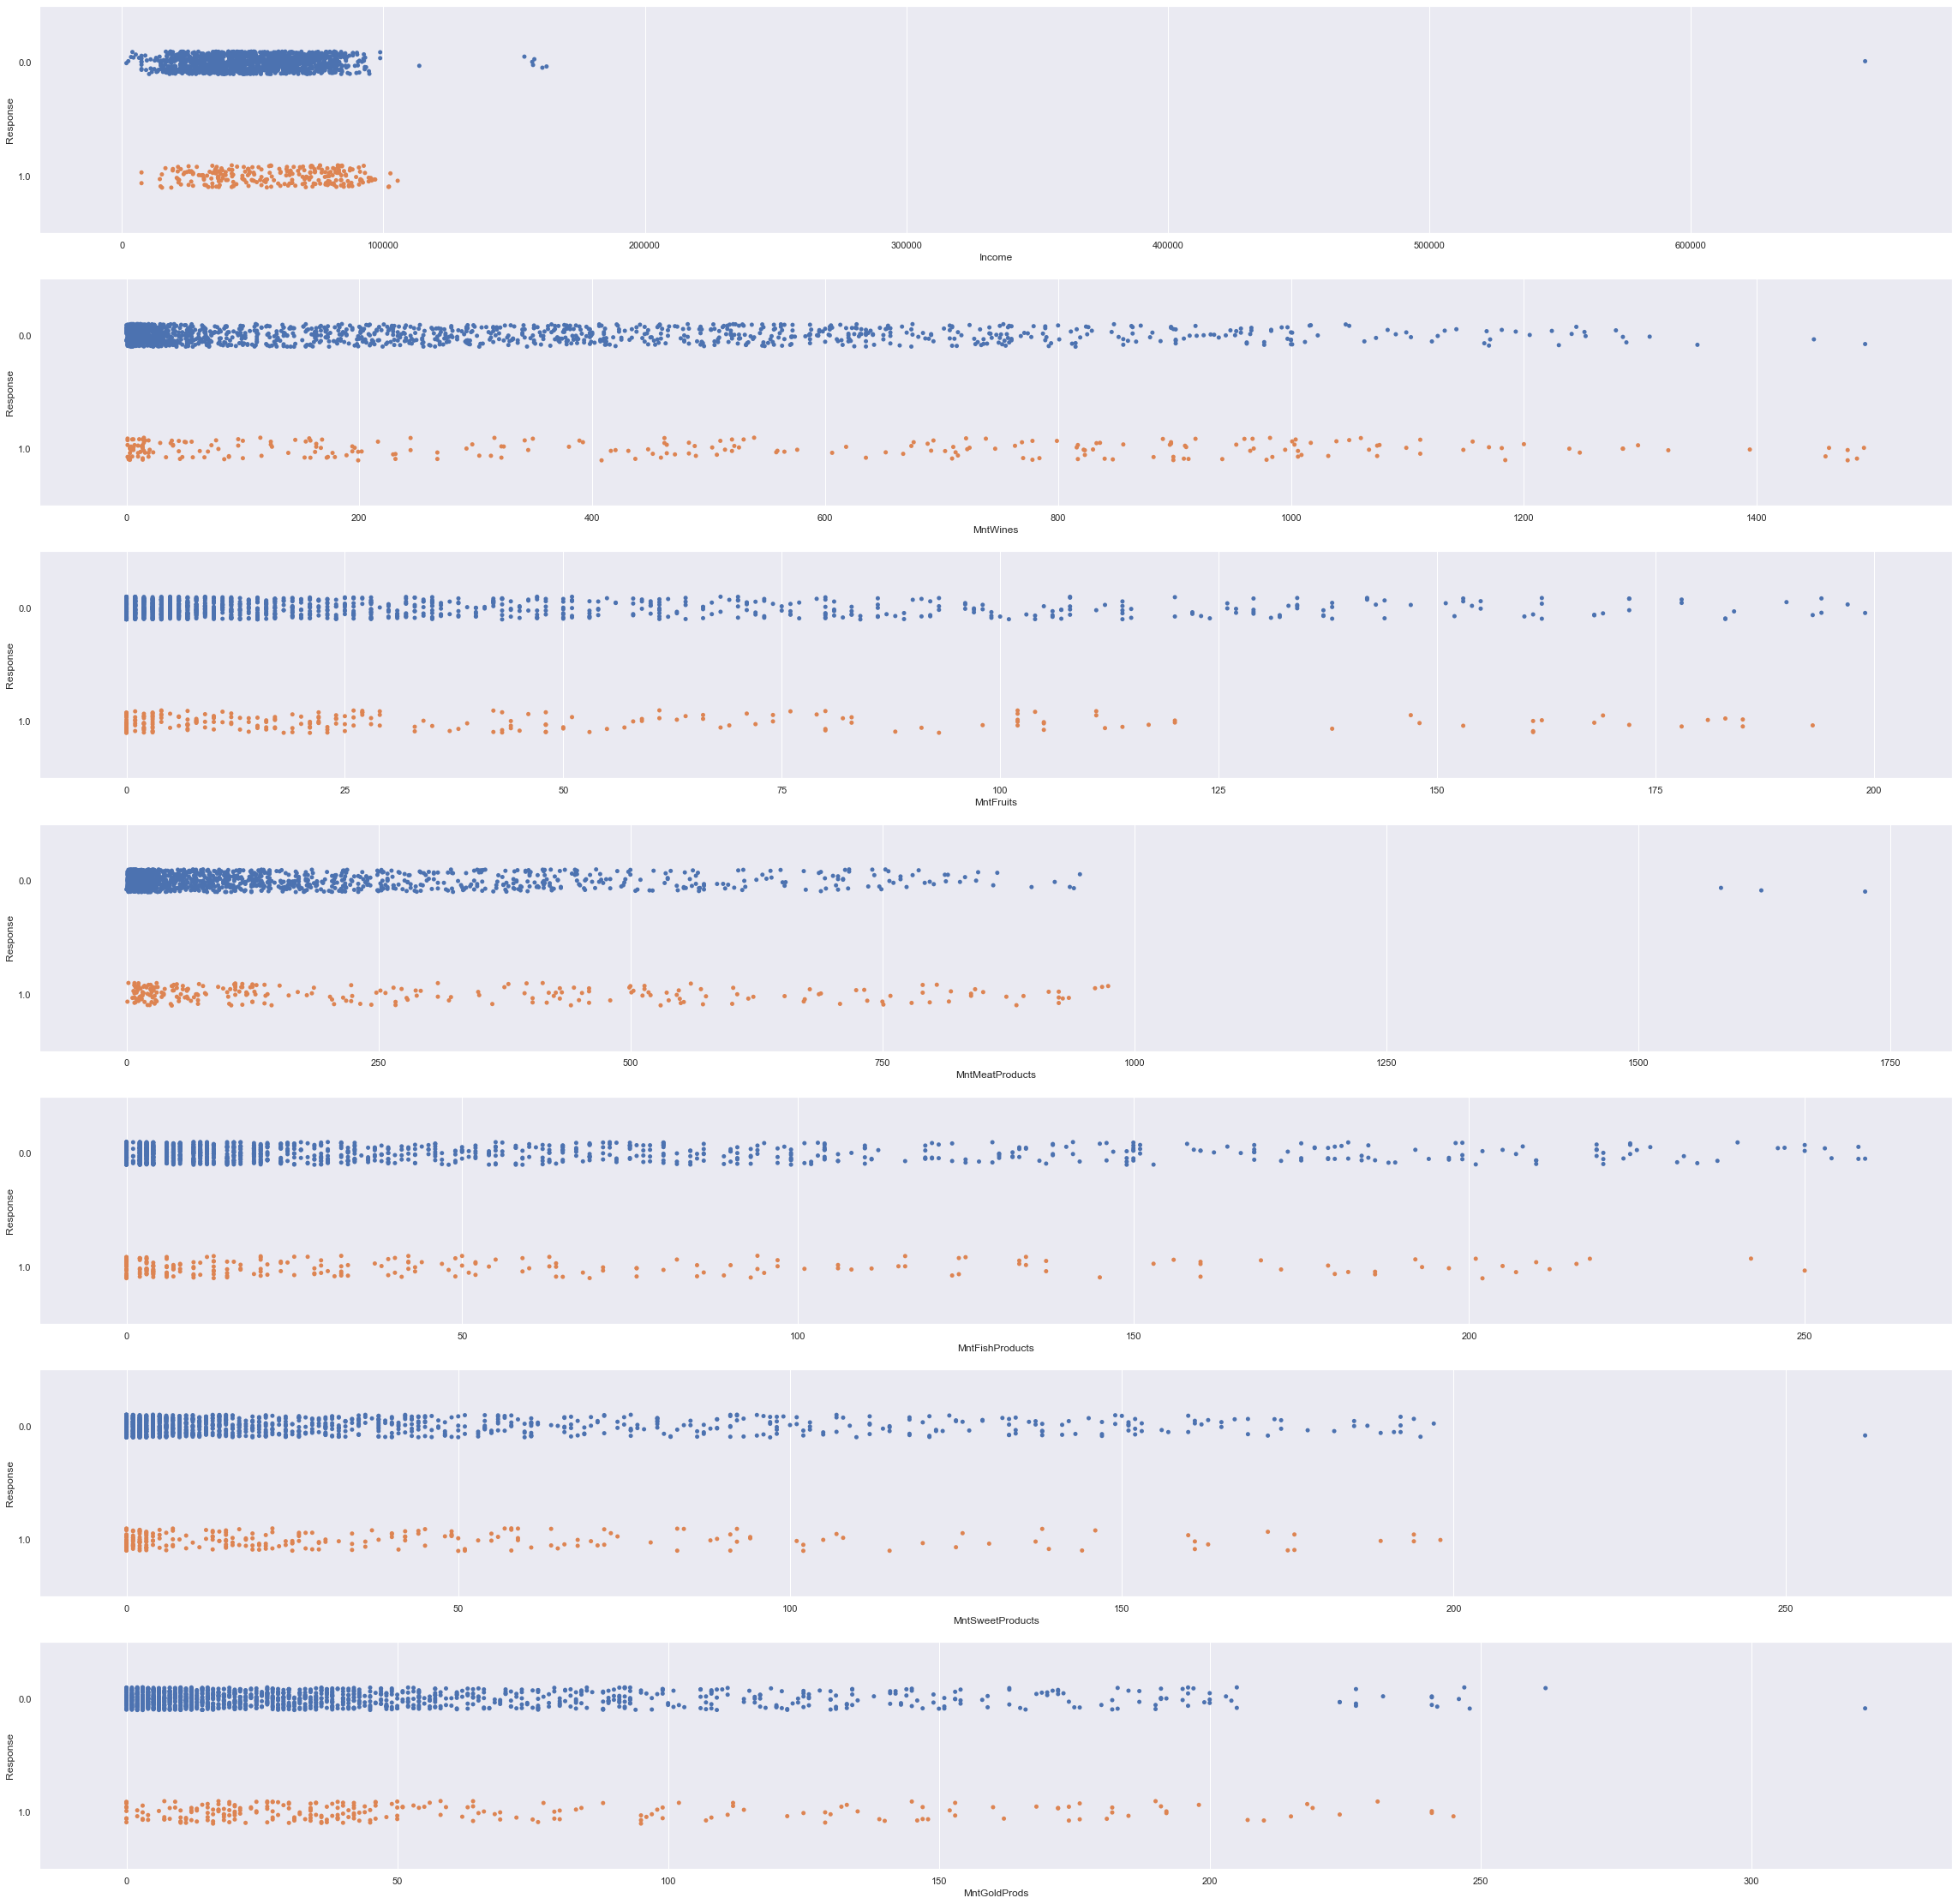

In [170]:
# Relationship between Response and the Predictors which are not Categorical
trainDF = pd.concat([y_train, x_train], axis = 1).reindex(y_train.index)
f, axes = plt.subplots(7, 1, figsize=(40, 40))
count = 0
for var in predictor_list:
    if(var not in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
        sb.stripplot(x = var, y = "Response", data = trainDF, orient = "h", ax = axes[count])
    count +=1

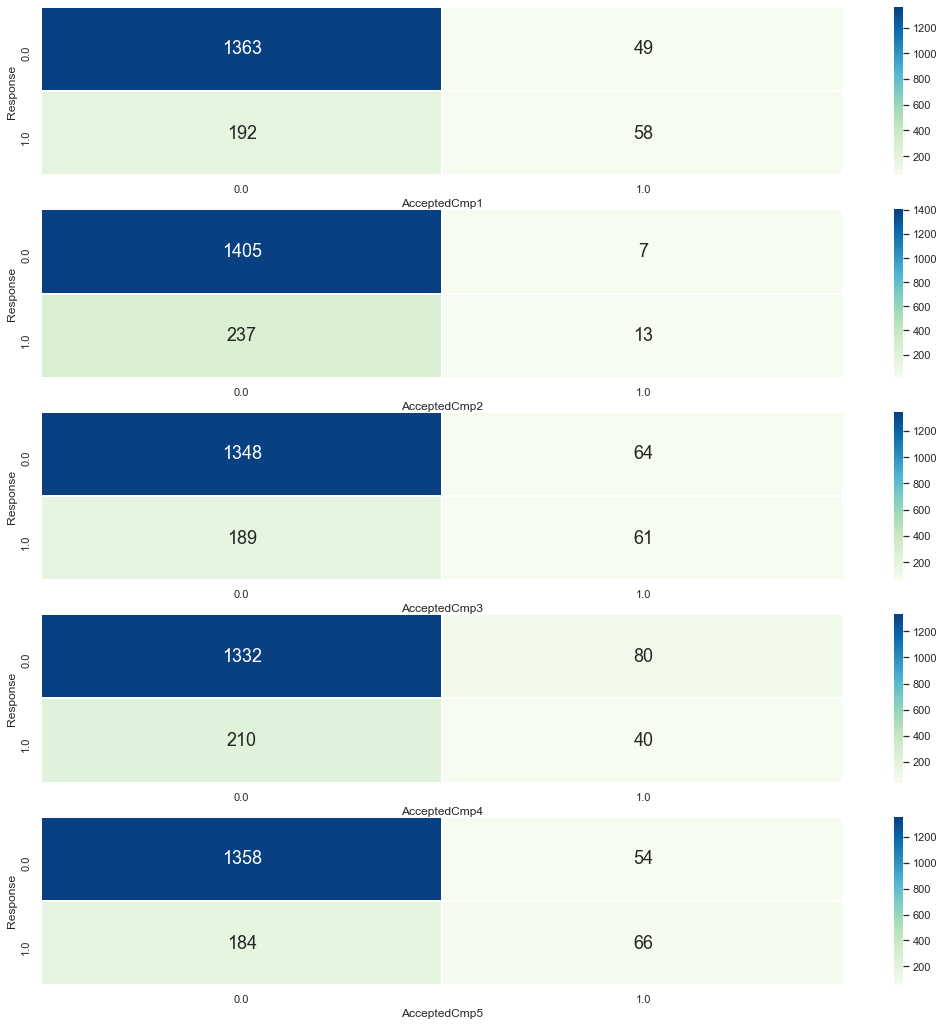

In [182]:
# Relationship between Response and the Predictors which are Categorical
f, axes = plt.subplots(5, 1, figsize=(18, 18))
count = 0
for var in predictor_list:
    if(var in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
        sb.heatmap(trainDF.groupby(['Response', var]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "GnBu",ax = axes[count])
        count +=1

---
## <font color = #0080ff> We will first use `DecisionTreeClassifier` as a basic model on the dataset</font>

In [175]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [176]:
# Split the Dataset into Train and Test was done above

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

[Text(0.5267857142857143, 0.9, 'AcceptedCmp5 <= 0.5\ngini = 0.256\nsamples = 1662\nvalue = [1412, 250]\nclass = Reject'),
 Text(0.2857142857142857, 0.7, 'AcceptedCmp3 <= 0.5\ngini = 0.21\nsamples = 1542\nvalue = [1358, 184]\nclass = Reject'),
 Text(0.14285714285714285, 0.5, 'MntMeatProducts <= 815.5\ngini = 0.171\nsamples = 1436\nvalue = [1300, 136]\nclass = Reject'),
 Text(0.07142857142857142, 0.3, 'MntMeatProducts <= 15.5\ngini = 0.162\nsamples = 1416\nvalue = [1290, 126]\nclass = Reject'),
 Text(0.03571428571428571, 0.1, 'gini = 0.066\nsamples = 380\nvalue = [367, 13]\nclass = Reject'),
 Text(0.10714285714285714, 0.1, 'gini = 0.194\nsamples = 1036\nvalue = [923, 113]\nclass = Reject'),
 Text(0.21428571428571427, 0.3, 'MntWines <= 334.0\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = Reject'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Reject'),
 Text(0.25, 0.1, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = Accept'),
 Text(0.4285714

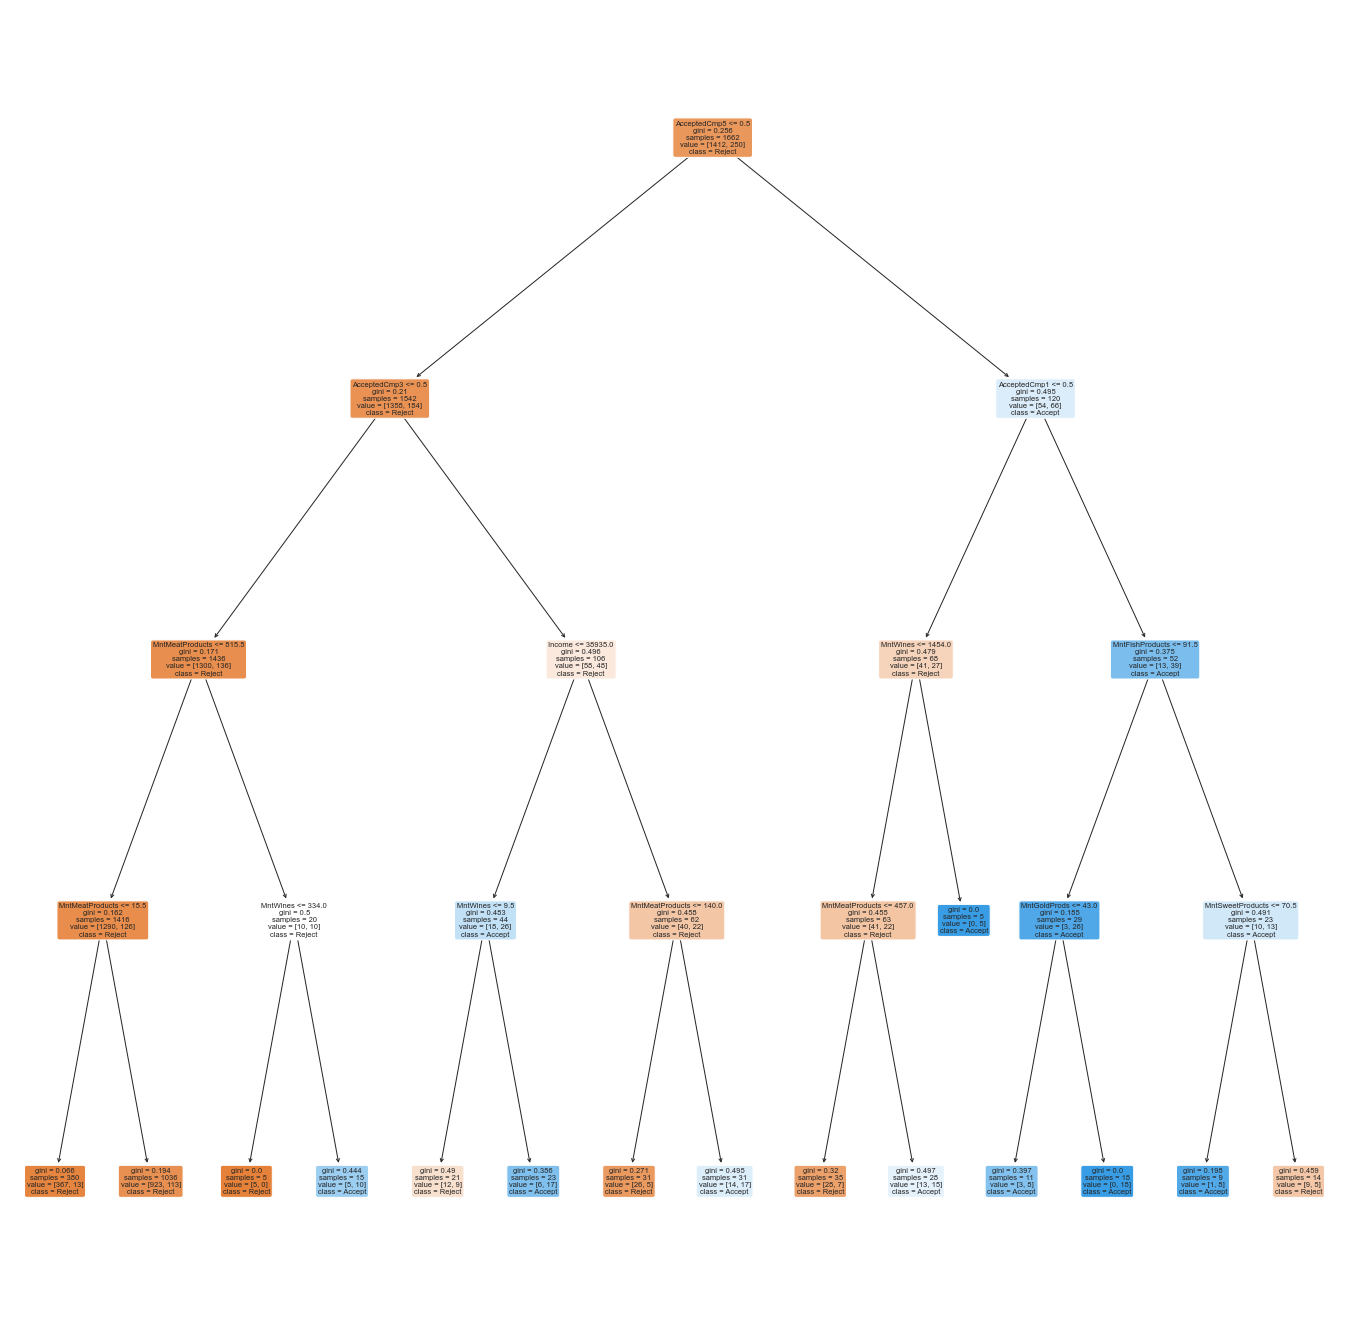

In [177]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["Reject","Accept"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### Train set

Train Data
Classification Accuracy  :	 0.8832731648616126

TPR Train :	 0.392
TNR Train :	 0.9702549575070821

FPR Train :	 0.029745042492917848
FNR Train :	 0.608


<AxesSubplot:>

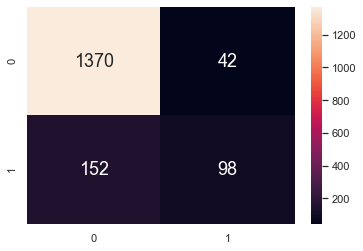

In [179]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Classification Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Test set

Test Data
Accuracy  :	 0.855595667870036

TPR Test :	 0.3373493975903614
TNR Test :	 0.9469214437367304

FPR Test :	 0.05307855626326964
FNR Test :	 0.6626506024096386


<AxesSubplot:>

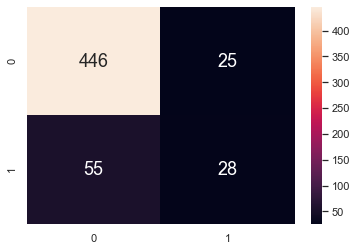

In [180]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Important** : Ther is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is not surprising -- actually, this is a direct effect of the large `Accept` vs `Reject` imbalance in the response variable `Response`. As `Response = Accept` was more likely in the data, *False Negatives* are more likely too.

Hence we should use a second model with resampling, to balance the class of the response varibale `Response` in the training data.

---
## <font color = #0080ff> Continuing with `DecisionTreeClassifier` as a basic model on the dataset accompanied with `resample` </font>

In [183]:
# Upsample Bad to match Good
from sklearn.utils import resample

---
## <font color = #0080ff> We will then use a Random Forest Classifier as an advanced classifier technique</font>

---
## <font color = #0080ff> We will then compare the effectiveness of classification with clustering</font>